# Class: [Data Science](https://git.generalassemb.ly/meccaLeccaHi/dat-sf-60)

**Student:** [Allen Au](https://www.linkedin.com/in/auallen/)    
    
**Date:** Dec. 3, 2019

## Final Project: NYC Real Estate Analysis

---

# Proposal

## The Problem

Visibility into Real Estate market has historically been opaque and segregated through local Multiple Listing Service (MLS) systems.  The understanding of a local market required a personal relationship with a Real Estate Broker with access to a local MLS sytesm.  Real Estate investment continues to be challenged with the following:

Cost
1. Requires a signifant capitol outlay 
2. Less liquid investment compared to stocks
3. Transaction cost is significant (closing cost, escrow, real estate agents, attourney fees, etc.)

**Predictablity**
3. Real Estate valuation can be emotional and subjective
4. Minimal insight into local market trends
 

## Proposal

With the advent of publicaly assesible data through government (City, State, US Gov.) agencies and private companies(i.e., Zillow), historical trends, insights, and predication can be asserted.

### Potential Datasets

**NYC Real Estate**
* New York City AirBnb: Historical analysis, Trends, Predictions (hosts, location, price)
 * Data Set: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
 
 
* New York Property Sales: Historical analysis, Trends, Predictions (buildings, apartments, location, price) 
 * Data Set: https://www.kaggle.com/new-york-city/nyc-property-sales
 
 
* Zillow Rent Index, 2010-Present
 * Data Set: https://www.kaggle.com/zillow/rent-index

### Hypothesis

**Goals and success metrics:**
1. Determine relative pricing relationship between different property types
2. Idenitfy sales volume between different property types
3. Identify neigborhood trends and their relationships with each other
4. Establsh a prediction for a particular neighborhood 


**Risks or limitations:**
What shortcoming exist for this data that make it less than ideal for answering this particular question?
1. Datasets above may not be complete
2. Datasets above may be biased during collection
3. Datasets above may not support specific questios in goals



### Strategies
 * https://www.kaggle.com/anilak1978/new-york-city-real-estate-property-analysis
 
 * https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
 
 * https://medium.com/geoai/house-hunting-the-data-scientist-way-b32d93f5a42f

# EDA

In [1]:
# Import libraries to read, anaylize and visualize data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

In [2]:
# this allows plots to appear directly in the notebook
%matplotlib inline

# this selects the 'style' that matplotlib will use to generate plots
plt.style.use('fivethirtyeight')

In [34]:
# Read imdb csv data into movies dataframe
# https://www.kaggle.com/new-york-city/nyc-property-sales
nyc = pd.read_csv('./nyc-rolling-sales-cleaner.csv')

# Show the 1st 5 rows
nyc.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
0,4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,...,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,C2,6625000.0,2017-07-19 00:00:00
1,5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,...,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14 00:00:00
2,6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,...,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09 00:00:00
3,7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,...,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,C4,3936272.0,2016-09-23 00:00:00
4,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,...,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,C2,8000000.0,2016-11-17 00:00:00


In [35]:
nyc[nyc['BOROUGH'] == 1.0].head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
0,4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,...,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,C2,6625000.0,2017-07-19 00:00:00
1,5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,...,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14 00:00:00
2,6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,...,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09 00:00:00
3,7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,...,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,C4,3936272.0,2016-09-23 00:00:00
4,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,...,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,C2,8000000.0,2016-11-17 00:00:00


In [36]:
nyc[nyc['BOROUGH'] == 2.0].head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
18306,4,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030.0,65.0,,A1,4455 PARK AVENUE,...,1.0,0.0,1.0,1622.0,1587.0,1899.0,1.0,A1,140000.0,2017-05-12 00:00:00
18307,5,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036.0,13.0,,A1,4348 PARK AVENUE,...,1.0,0.0,1.0,3525.0,1764.0,1899.0,1.0,A1,420000.0,2017-02-03 00:00:00
18308,6,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043.0,55.0,,A1,1948 BATHGATE AVENUE,...,1.0,0.0,1.0,2356.0,2047.0,1901.0,1.0,A1,127000.0,2017-08-22 00:00:00
18309,7,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046.0,52.0,,A1,2047 BATHGATE AVENUE,...,1.0,0.0,1.0,2329.0,1431.0,1901.0,1.0,A1,273796.0,2016-09-21 00:00:00
18310,8,2.0,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046.0,52.0,,A1,2047 BATHGATE AVENUE,...,1.0,0.0,1.0,2329.0,1431.0,1901.0,1.0,A1,231244.0,2016-09-21 00:00:00


In [37]:
nyc[nyc['BOROUGH'] == 3.0].head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
25355,4,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360.0,157.0,,A5,36 BAY 10TH STREET,...,1.0,0.0,1.0,1547.0,1428.0,1930.0,1.0,A5,800000.0,2017-02-27 00:00:00
25356,5,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361.0,20.0,,A5,47 BAY 10TH STREET,...,1.0,0.0,1.0,1933.0,1660.0,1930.0,1.0,A5,0.0,2017-03-04 00:00:00
25357,6,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6364.0,2.0,,A5,1649 BENSON AVENUE,...,1.0,0.0,1.0,1638.0,972.0,1930.0,1.0,A5,0.0,2016-10-06 00:00:00
25358,7,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367.0,42.0,,S1,1730 86TH STREET,...,1.0,1.0,2.0,1342.0,1920.0,1926.0,1.0,S1,1200000.0,2017-03-31 00:00:00
25359,8,3.0,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374.0,67.0,,S1,8642 20TH AVENUE,...,1.0,1.0,2.0,1740.0,3240.0,1925.0,1.0,S1,1090000.0,2016-10-24 00:00:00


In [38]:
nyc[nyc['BOROUGH'] == 4.0].head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
49402,4,4.0,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976.0,15.0,,A5,21-20 81ST STREET,...,1.0,0.0,1.0,1800.0,1224.0,1950.0,1.0,A5,792000.0,2017-07-26 00:00:00
49403,5,4.0,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976.0,54.0,,A5,21-35 80TH STREET,...,1.0,0.0,1.0,1800.0,1224.0,1950.0,1.0,A5,10.0,2017-06-13 00:00:00
49404,6,4.0,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976.0,63.0,,A5,21-17 80TH STREET,...,1.0,0.0,1.0,1800.0,1224.0,1950.0,1.0,A5,275500.0,2016-11-18 00:00:00
49405,7,4.0,AIRPORT LA GUARDIA,03 THREE FAMILY DWELLINGS,1,949.0,17.0,,C0,1914 81 STREET,...,3.0,0.0,3.0,2826.0,1840.0,1940.0,1.0,C0,970000.0,2017-07-31 00:00:00
49406,8,4.0,AIRPORT LA GUARDIA,07 RENTALS - WALKUP APARTMENTS,2A,949.0,67.0,,C2,1949A 80TH STREET,...,6.0,0.0,6.0,2400.0,3960.0,1971.0,2.0,C2,1400000.0,2017-05-16 00:00:00


In [39]:
nyc[nyc['BOROUGH'] == 5.0].head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
76138,4,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,5426.0,32.0,,A6,3 OCEAN DRIVEWAY,...,1.0,0.0,1.0,2500.0,540.0,1910.0,1.0,A6,0.0,2017-06-03 00:00:00
76139,5,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205.0,22.0,,A5,83 EAGAN AVENUE,...,1.0,0.0,1.0,1546.0,1579.0,1986.0,1.0,A5,437500.0,2017-05-30 00:00:00
76140,6,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205.0,58.0,,A5,32 SEGUINE PLACE,...,1.0,0.0,1.0,1471.0,1068.0,1986.0,1.0,A5,0.0,2017-03-13 00:00:00
76141,7,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209.0,69.0,,A5,195 MOSELY AVENUE,...,1.0,0.0,1.0,2665.0,1592.0,2007.0,1.0,A5,579000.0,2016-11-21 00:00:00
76142,8,5.0,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209.0,71.0,,A5,191 MOSELY AVENUE,...,1.0,0.0,1.0,2665.0,1592.0,2007.0,1.0,A5,0.0,2017-05-05 00:00:00


Based on address sample, we can guess the Borough Index mapping
* BOROUGH = 1.0: Manhattan
* BOROUGH = 2.0: Brooklyn > Bronx?
* BOROUGH = 3.0: Bronx > Brooklyn?
* BOROUGH = 4.0: Queens
* BOROUGH = 5.0: Staten Island

In [132]:
# Average sale price by Borough
nyc.groupby("BOROUGH").SALEPRICE.mean()

BOROUGH
1.0    3.716478e+06
2.0    6.523794e+05
3.0    8.844772e+05
4.0    5.725631e+05
5.0    3.913725e+05
Name: SALEPRICE, dtype: float64

In [17]:
nyc.dtypes

Unnamed: 0                         object
BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALEPRICE                         float64
SALE DATE                          object
dtype: object

In [9]:
nyc.info

<bound method DataFrame.info of                                               Unnamed: 0  BOROUGH  \
0                                                      4      1.0   
1                                                      5      1.0   
2                                                      6      1.0   
3                                                      7      1.0   
4                                                      8      1.0   
5                                                      9      1.0   
6                                                     10      1.0   
7                                                     11      1.0   
8                                                     12      1.0   
9                                                     13      1.0   
10                                                    14      1.0   
11                                                    15      1.0   
12     16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENT...      NaN   
13

In [10]:
nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALEPRICE', 'SALE DATE'],
      dtype='object')

In [5]:
nyc.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,67830.000000,67830.000000,67830.000000,67830.000000,67830.000000,67830.000000,67830.000000,6.783000e+04,6.783000e+04,67830.000000,67830.000000,6.783000e+04
mean,3.159457,4515.328395,433.839673,10749.371148,2.524163,0.241235,2.803243,3.386944e+03,3.395826e+03,1756.099735,1.573168,1.149625e+06
std,1.223877,3676.456304,692.941060,1407.190218,18.634539,9.727287,21.145354,3.894570e+04,3.213052e+04,586.526538,0.894783,1.157724e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,3.000000,1411.000000,26.000000,10312.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1920.000000,1.000000,0.000000e+00
50%,3.000000,3776.000000,58.000000,11212.000000,1.000000,0.000000,1.000000,2.001000e+03,1.431000e+03,1931.000000,1.000000,4.270000e+05
75%,4.000000,6624.000000,1018.000000,11357.000000,2.000000,0.000000,2.000000,3.040000e+03,2.346000e+03,1979.000000,2.000000,8.511335e+05
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


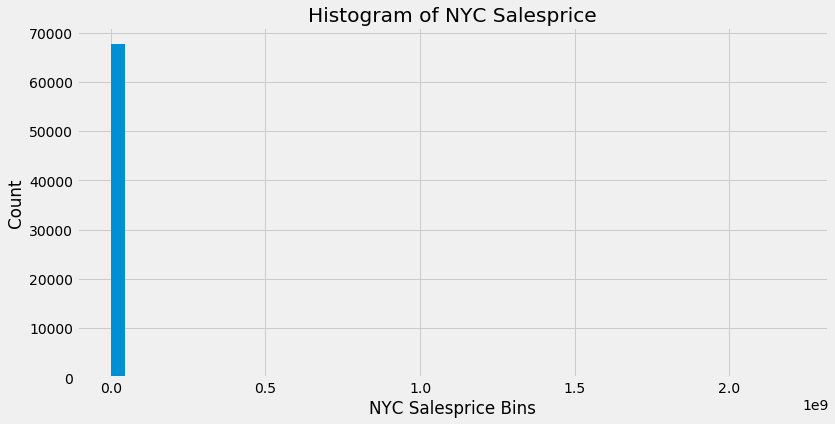

In [130]:
# Histogram for duration
# Using rule of thumb for number of bins: sqrt(979) = 33 bins
ax = nyc['SALEPRICE'].hist(bins=50, figsize=(12,6))

ax.set_title('Histogram of NYC Salesprice')
ax.set_xlabel("NYC Salesprice Bins");
ax.set_ylabel("Count");

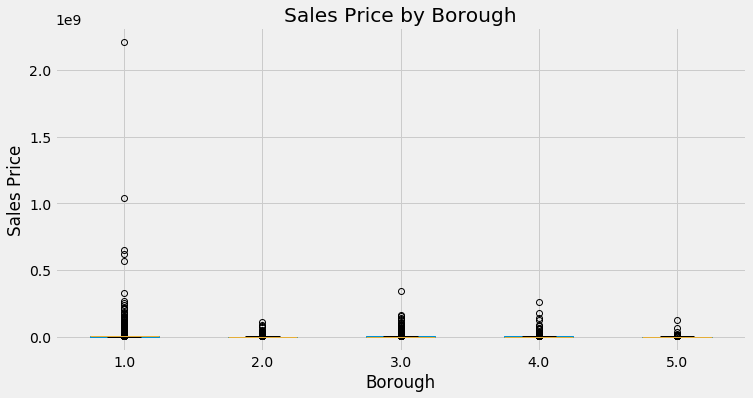

In [104]:
# Content Ratings by Duration
ax = nyc.boxplot(column='SALEPRICE', by='BOROUGH', figsize=(12,6));
plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Sales Price by Borough');
ax.set_xlabel('Borough');
ax.set_ylabel('Sales Price');

In [53]:
nyc.groupby(['BOROUGH']).mean()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
BOROUGH,,,,,,,,,,,
1.0,1041.057146,1147.108004,9830.494229,3.963498,0.514779,4.551187,984.966595,5996.512715,1566.821620,2.223609,3.716478e+06
2.0,4117.056103,308.211221,10343.668893,4.044916,0.189347,4.241610,4645.691768,5325.120220,1709.317248,1.441643,6.523794e+05
3.0,4267.912917,372.636032,11054.993773,2.291680,0.166581,2.499977,2438.763519,2893.703591,1745.409617,1.618896,8.844772e+05
4.0,7069.409967,264.828015,11288.654080,2.112675,0.256235,2.407598,3555.587386,2641.975849,1830.455715,1.395755,5.725631e+05
5.0,3273.850012,204.436098,10035.979262,1.243550,0.080540,1.326742,7568.321558,1911.125512,1867.588618,1.175187,3.913725e+05


In [154]:
nyc.groupby('BOROUGH')['SALEPRICE'].value_counts()

BOROUGH  SALEPRICE  
1.0      0.0            3133
         10.0             91
         1100000.0        37
         750000.0         33
         1250000.0        33
         1750000.0        33
         1150000.0        32
         1300000.0        32
         1.0              31
         2900000.0        31
         1200000.0        30
         2000000.0        29
         2100000.0        29
         2200000.0        29
         900000.0         28
         1600000.0        28
         1350000.0        27
         1050000.0        26
         1700000.0        26
         1800000.0        26
         2300000.0        26
         2250000.0        25
         800000.0         24
         1900000.0        24
         950000.0         23
         975000.0         23
         1550000.0        23
         2700000.0        23
         850000.0         22
         1500000.0        22
                        ... 
5.0      2350000.0         1
         2500000.0         1
         2550000.0    

In [58]:
nyc['BOROUGH'].value_counts(sort=True, ascending=False)

4.0    21531
3.0    21359
1.0    10657
5.0     8294
2.0     5989
Name: BOROUGH, dtype: int64

In [122]:
nyc['ZIP CODE'].value_counts(sort=True, ascending=False).head(5)

10314.0    1684
11354.0    1181
11234.0    1104
10312.0    1086
10306.0    1049
Name: ZIP CODE, dtype: int64

In [4]:
nyc.isnull().sum()

Unnamed: 0                            0
BOROUGH                           16718
NEIGHBORHOOD                      16718
BUILDING CLASS CATEGORY           16718
TAX CLASS AT PRESENT              16718
BLOCK                             16718
LOT                               16718
EASE-MENT                         16718
BUILDING CLASS AT PRESENT         16718
ADDRESS                           16718
APARTMENT NUMBER                  16718
ZIP CODE                          16718
RESIDENTIAL UNITS                 16718
COMMERCIAL UNITS                  16718
TOTAL UNITS                       16718
LAND SQUARE FEET                  16718
GROSS SQUARE FEET                 16718
YEAR BUILT                        16718
TAX CLASS AT TIME OF SALE         16718
BUILDING CLASS AT TIME OF SALE    16718
SALEPRICE                         16718
SALE DATE                         16718
dtype: int64

## Focus EDA on Mahattan

In [124]:
nyc_manhattan = nyc[nyc.BOROUGH == 1.0]
nyc_manhattan.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALEPRICE,SALE DATE
0,4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,...,5.0,0.0,5.0,1633.0,6440.0,1900.0,2.0,C2,6625000.0,2017-07-19 00:00:00
1,5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,...,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14 00:00:00
2,6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,...,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09 00:00:00
3,7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,...,10.0,0.0,10.0,2272.0,6794.0,1913.0,2.0,C4,3936272.0,2016-09-23 00:00:00
4,8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,...,6.0,0.0,6.0,2369.0,4615.0,1900.0,2.0,C2,8000000.0,2016-11-17 00:00:00


In [129]:
nyc_manhattan.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALEPRICE
count,10657.0,10657.000000,10657.000000,10657.000000,10657.000000,10657.000000,10657.000000,10657.000000,1.065700e+04,10657.000000,10657.000000,1.065700e+04
mean,1.0,1041.057146,1147.108004,9830.494229,3.963498,0.514779,4.551187,984.966595,5.996513e+03,1566.821620,2.223609,3.716478e+06
std,0.0,568.612419,858.141403,1401.212923,29.034060,8.558862,30.406549,7075.534795,4.931729e+04,788.876658,0.704989,2.801680e+07
min,1.0,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1.0,626.000000,1020.000000,10012.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1900.000000,2.000000,0.000000e+00
50%,1.0,1063.000000,1143.000000,10019.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1940.000000,2.000000,1.050000e+06
75%,1.0,1437.000000,1320.000000,10028.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,2002.000000,2.000000,2.750000e+06
max,1.0,2250.000000,9106.000000,10463.000000,1641.000000,422.000000,1653.000000,364000.000000,2.155492e+06,2017.000000,4.000000,2.210000e+09


In [67]:
nyc_manhattan.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALEPRICE                         0
SALE DATE                         0
dtype: int64

Wow!!  No NaNs/missing data for Manhattan!!!!

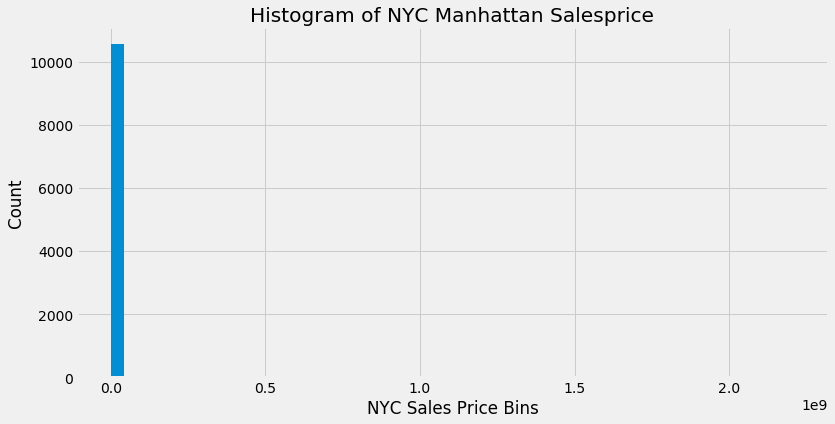

In [78]:
# Histogram for duration
# Using rule of thumb for number of bins: sqrt(979) = 33 bins
ax = nyc_manhattan['SALEPRICE'].hist(bins=50, figsize=(12,6))

ax.set_title('Histogram of NYC Manhattan Salesprice')
ax.set_xlabel("NYC Sales Price Bins");
ax.set_ylabel("Count");

### Data Filtering and Clearning

- [x] Filter out non-Manhattan data
- [x]  Get rid of NaNs - done (Mahattan)
- [x] Get rid of SALEPRICE = 0 (covered by filtering out < \$100k)
- [x] Get rid of SALEPRICE < $100K
- [ ] Get rid of high outliers?

In [117]:
# Filter out proprerty less than $100,000
#nyc_manhattan = nyc_manhattan[nyc_manhattan['SALEPRICE'] != 0]
nyc_manhattan = nyc_manhattan[nyc_manhattan['SALEPRICE'] > 100000]

In [118]:
# What is the effect of filter out data
nyc_manhattan['SALEPRICE'].describe()

count    7.234000e+03
mean     5.474107e+06
std      3.386433e+07
min      1.003350e+05
25%      1.008562e+06
50%      1.875000e+06
75%      4.250000e+06
max      2.210000e+09
Name: SALEPRICE, dtype: float64

In [119]:
nyc_manhattan['SALEPRICE'].sort_values(ascending=False).tail(10)

16447    139000.0
9735     138750.0
973      137500.0
9636     131881.0
5678     125500.0
16496    119276.0
6170     119000.0
9635     107820.0
9639     107820.0
11766    100335.0
Name: SALEPRICE, dtype: float64

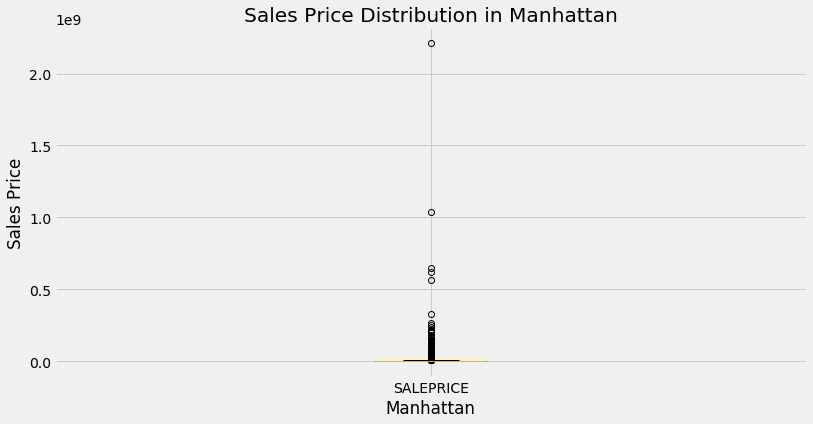

In [120]:
ax = nyc_manhattan.boxplot(column='SALEPRICE', figsize=(12,6));
plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Sales Price Distribution in Manhattan');
ax.set_xlabel('Manhattan');
ax.set_ylabel('Sales Price');

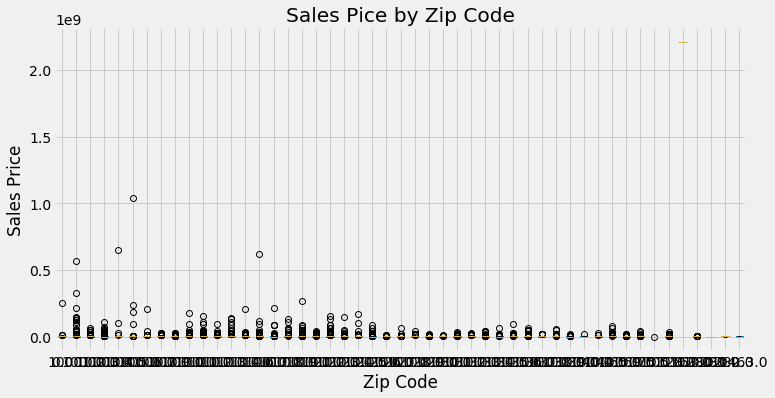

In [149]:
# Content Ratings by Duration
ax = nyc_manhattan.boxplot(column='SALEPRICE', by='ZIP CODE', figsize=(12,6));

plt.suptitle("") # Gets rid of title automatically generated
ax.set_title('Sales Pice by Zip Code');
ax.set_xlabel('Zip Code');
ax.set_ylabel('Sales Price');

In [148]:
# Top 10 Zip Codes with highest average sale price
nyc_manhattan.groupby("ZIP CODE").SALEPRICE.mean().sort_values(ascending=False).head(5)

ZIP CODE
10167.0    2.210000e+09
10001.0    1.826806e+07
10004.0    1.135201e+07
10005.0    9.275539e+06
10018.0    7.921777e+06
Name: SALEPRICE, dtype: float64

**Top 5 Manhattan Zip Codes and Neighborhoods** 
1. 10167: Midtown
2. 10001: Chelsea
3. 10004: Battery Park
4. 10005: Wall Street
5. 10018: Midtown West

In [156]:
nyc_manhattan.groupby('ZIP CODE')['x'].value_counts()

ZIP CODE  SALEPRICE
0.0       0.0          41
          1781937.0     3
          1756481.0     2
          2138325.0     2
          3360225.0     2
          3500000.0     2
          4174825.0     2
          4350000.0     2
          9673375.0     2
          55800.0       1
          224015.0      1
          280018.0      1
          390390.0      1
          401591.0      1
          413712.0      1
          414726.0      1
          455286.0      1
          563244.0      1
          566147.0      1
          591603.0      1
          616041.0      1
          634692.0      1
          635388.0      1
          650661.0      1
          660844.0      1
          911333.0      1
          915406.0      1
          952063.0      1
          988211.0      1
          1033778.0     1
                       ..
10280.0   1740740.0     1
          1749879.0     1
          1750000.0     1
          1753500.0     1
          1770000.0     1
          1820000.0     1
          1888000.

In [152]:
top_mahattan_zip_codes = ['10167','10001','10004', '10005', '10018']

nyc_manhattan_top_zip = nyc_manhattan[nyc_manhattan['ZIP CODE'].isin(top_mahattan_zip_codes)

SyntaxError: unexpected EOF while parsing (<ipython-input-152-eb28d789b7e9>, line 3)